<a href="https://colab.research.google.com/github/random-rohit123/Cat--vs--Dog/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 23.7MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.4MB/s]


In [ ]:
import zipfile
zipfile_ref= zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zipfile_ref.extractall("/content")
zipfile_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(directory="/content/train",labels= 'inferred',label_mode='int',batch_size=32,image_size= (256,256))
val_ds = keras.utils.image_dataset_from_directory(directory="/content/test",labels= 'inferred',label_mode='int',batch_size=32,image_size= (256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalization
def process(image,label):
  image= tf.cast(image/255., tf.float32)
  return image, label
train_ds= train_ds.map(process)
val_ds=val_ds.map(process)

In [ ]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding= 'valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides= 2,padding= 'valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding= 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides= 2,padding= 'valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding= 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size= (2,2),strides= 2,padding= 'valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,681 (56.64 MB)

 Trainable params: 14,847,489 (56.64 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer='adam',loss= "binary_crossentropy",metrics= ['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs=10,validation_data= val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 85ms/step - accuracy: 0.5870 - loss: 2.3503 - val_accuracy: 0.5960 - val_loss: 0.8399
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6843 - loss: 0.5787 - val_accuracy: 0.6888 - val_loss: 0.5942
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7369 - loss: 0.5242 - val_accuracy: 0.7586 - val_loss: 0.4882
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.7783 - loss: 0.4633 - val_accuracy: 0.7742 - val_loss: 0.4817
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 86ms/step - accuracy: 0.8108 - loss: 0.4010 - val_accuracy: 0.8012 - val_loss: 0.4543
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8415 - loss: 0.3428 - val_accuracy: 0.6372 - val_loss: 1.0739
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8651 - loss: 0.2907 - val_accuracy: 0.7908 - val_loss: 0.5150
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8866 - loss: 0.2382 - 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

NameError: name 'history' is not defined

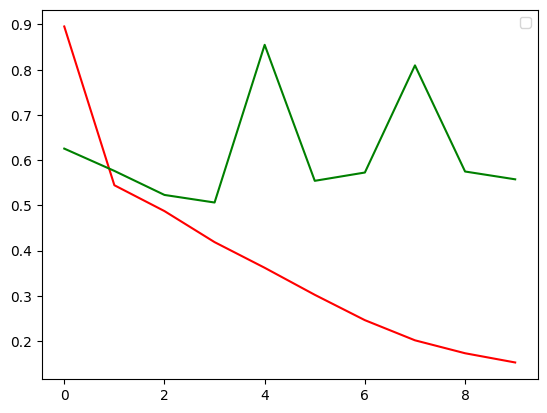

In [ ]:
plt.plot(history.history['loss'],color= 'red')
plt.plot(history.history['val_loss'],color='green')
plt.legend()
plt.show()

In [ ]:
# reduce overfitting
# add more data
# l1/l2 regularization
# drop out

In [ ]:
import cv2

In [ ]:
test_img= cv2.imread("/content/dog2.jpg")

array([[[ 19,  50,  71],
        [ 22,  53,  74],
        [ 23,  55,  74],
        ...,
        [132, 128, 134],
        [129, 125, 131],
        [131, 127, 133]],

       [[ 21,  52,  73],
        [ 22,  54,  73],
        [ 27,  59,  78],
        ...,
        [133, 129, 134],
        [128, 124, 130],
        [129, 125, 130]],

       [[ 30,  60,  79],
        [ 28,  58,  75],
        [ 37,  67,  84],
        ...,
        [131, 128, 130],
        [125, 121, 126],
        [124, 121, 123]],

       ...,

       [[ 48, 108,  60],
        [ 65, 125,  77],
        [ 63, 123,  75],
        ...,
        [ 57, 132,  86],
        [ 58, 133,  87],
        [ 36, 111,  65]],

       [[ 53, 113,  65],
        [ 59, 119,  71],
        [ 84, 144,  96],
        ...,
        [ 74, 149, 103],
        [100, 175, 129],
        [113, 188, 142]],

       [[ 36,  96,  48],
        [ 59, 119,  71],
        [108, 168, 120],
        ...,
        [ 87, 162, 116],
        [ 92, 167, 121],
        [ 39, 114,  68]]], dtype=uint8)
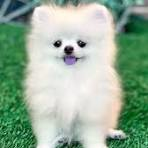

In [ ]:
test_img

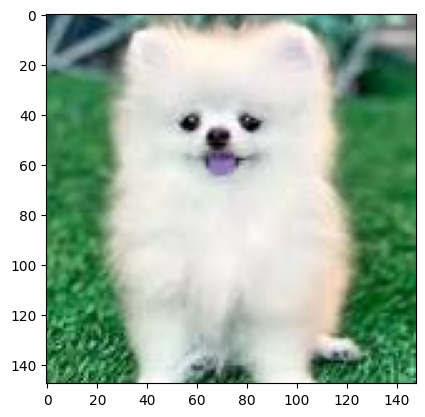

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 148, 3)

In [ ]:
test_img= cv2.resize(test_img,(256,256))

In [ ]:
test_input= test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)